# Importing libraries

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset

In [89]:
dataset = pd.read_csv('/content/cars.csv')

# Extract features and target variable
X = dataset.drop(columns=['Car_ID', 'Price'])
y = dataset['Price'].values

print(X.head())

     Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Toyota  Corolla  2018              50000    Petrol       Manual   
1    Honda    Civic  2019              40000    Petrol    Automatic   
2     Ford  Mustang  2017              20000    Petrol    Automatic   
3   Maruti    Swift  2020              30000    Diesel       Manual   
4  Hyundai   Sonata  2016              60000    Diesel    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats  
0      First       15    1498    108      5  
1     Second       17    1597    140      5  
2      First       10    4951    395      4  
3      Third       23    1248     74      5  
4     Second       18    1999    194      5  


# Encoding Categorical values

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical features
categorical_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Applying OneHotEncoder to categorical features
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = ct.fit_transform(X).toarray()  #Convert the sparse matrix to a dense array
np.set_printoptions(precision=2, suppress=True)
print(X)

[[   0.    0.    0. ... 1498.  108.    5.]
 [   0.    0.    0. ... 1597.  140.    5.]
 [   0.    0.    1. ... 4951.  395.    4.]
 ...
 [   0.    0.    1. ... 1497.  121.    5.]
 [   0.    0.    0. ... 1497.  113.    5.]
 [   0.    0.    0. ... 1199.   85.    5.]]


# Splitting into Train and Test set

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
X_train

array([[   1.,    0.,    0., ..., 1968.,  187.,    5.],
       [   0.,    0.,    1., ..., 2261.,  396.,    4.],
       [   1.,    0.,    0., ..., 1984.,  241.,    5.],
       ...,
       [   0.,    0.,    0., ..., 1462.,  103.,    7.],
       [   0.,    0.,    0., ..., 1598.,  103.,    5.],
       [   0.,    0.,    0., ..., 1197.,   81.,    5.]])

In [93]:
X_test

array([[   0.,    0.,    0., ..., 1498.,  148.,    5.],
       [   0.,    0.,    0., ..., 1497.,  115.,    5.],
       [   0.,    0.,    0., ..., 1956.,  150.,    7.],
       ...,
       [   0.,    0.,    0., ..., 1496.,  106.,    5.],
       [   0.,    0.,    0., ..., 1497.,  113.,    5.],
       [   0.,    0.,    0., ..., 1582.,  126.,    5.]])

In [94]:
y_train

array([2600000, 2700000, 3200000,  500000,  800000,  650000, 1500000,
       1400000, 2700000,  750000, 2000000, 3200000, 3200000, 2700000,
       2600000,  750000, 2700000, 2800000,  500000, 1800000, 1800000,
        750000,  650000, 2900000, 2800000, 2500000,  700000, 1600000,
       1200000, 1600000, 1200000,  600000, 1900000, 4000000, 2200000,
       1500000,  900000, 3200000, 2000000,  550000, 2800000,  600000,
        650000,  700000, 2700000, 2500000, 3000000,  600000,  600000,
        750000,  450000,  450000, 1400000, 2400000,  850000, 2900000,
       3500000, 1300000, 2800000,  750000, 1600000, 3000000, 3500000,
       2500000, 1000000,  500000,  550000, 2500000,  600000, 1800000,
        700000, 2000000, 2400000,  850000, 1400000,  850000,  700000,
        850000,  650000,  550000])

In [95]:
y_test

array([1600000,  700000, 1300000, 1600000,  850000,  650000,  850000,
        500000, 2300000,  800000, 3000000,  600000,  500000,  700000,
        500000,  850000, 4000000,  650000,  850000,  800000])

#Training the Linear Regression model on the Training set

In [96]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting the Test set results

In [97]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1257427.92 1600000.  ]
 [ 700000.    700000.  ]
 [1300000.   1300000.  ]
 [1257427.92 1600000.  ]
 [ 850000.    850000.  ]
 [1074817.95  650000.  ]
 [ 999245.25  850000.  ]
 [ 500000.    500000.  ]
 [2427553.4  2300000.  ]
 [ 884879.91  800000.  ]
 [2603337.   3000000.  ]
 [ 600000.    600000.  ]
 [ 500000.    500000.  ]
 [ 700000.    700000.  ]
 [ 500000.    500000.  ]
 [1543378.87  850000.  ]
 [4000000.   4000000.  ]
 [1074817.95  650000.  ]
 [ 788423.37  850000.  ]
 [ 800000.    800000.  ]]


#Evaluating the model

In [98]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 64165396887.109924
R-squared: 0.9215438076822035


#Visualizing the Actual vs. Predicted values

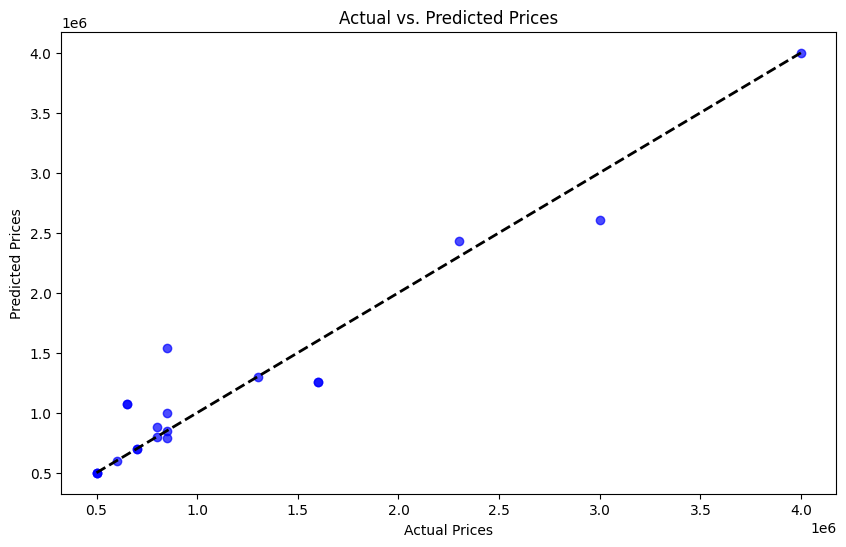

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


#Testing the model with custom values

In [101]:
test_case = pd.DataFrame({
    'Brand': ['Toyota'],
    'Model': ['Corolla'],
    'Year': [2018],
    'Kilometers_Driven': [100000],
    'Fuel_Type': ['Petrol'],
    'Transmission': ['Manual'],
    'Owner_Type': ['First'],
    'Mileage': [18.0],
    'Engine': [1794],
    'Power': [125],
    'Seats': [5]
})

# Encode the custom data
encoded_testcase = ct.transform(test_case).toarray()

# Predict the price using the trained model
custom_pred = regressor.predict(encoded_testcase)
np.set_printoptions(precision=2)
print(f'Predicted price: {custom_pred[0]:.2f}')

Predicted price: 291339.09
